In [11]:
import pandas as pd
import numpy as np

proteomes = "c.elegans ciliate drosophila e.coli human methanocaldococcus mouse thermococcus tuberculosis yeast zebrafish".split()
proteins = "H2A H2B H3 H4 BRD4".split()

data = dict()
data_unlog = dict()

for proteome in proteomes:
    data[proteome] = dict()
    data_unlog[proteome] = dict()
    for protein in proteins:
        with open(f"hw2_data/results/{protein}-{proteome}.blast", 'r') as f:
            res = float(f.readlines()[5].split()[10])
        data_unlog[proteome][protein] = res
        data[proteome][protein] = max(0, -np.log10(max(res, 1e-300)))


df = pd.DataFrame.from_records(data)
df_unlog = pd.DataFrame.from_records(data_unlog)
df_unlog

,c.elegans,ciliate,drosophila,e.coli,human,methanocaldococcus,mouse,thermococcus,tuberculosis,yeast,zebrafish
H2A,2.710000e-45,3.440000e-46,1.230000e-43,1.180000e-21,0.000000e+00,1.200000,0.000000e+00,1.710000e-07,5.290000e-09,1.070000e-45,0.000000e+00
H2B,1.450000e-65,3.540000e-50,3.510000e-60,1.700000e+00,2.000000e-88,1.900000,3.540000e-86,1.200000e+00,2.400000e+00,1.820000e-59,2.930000e-81
H3,4.460000e-94,8.410000e-86,9.390000e-96,9.000000e-01,2.190000e-96,0.034000,1.540000e-96,5.700000e-02,4.600000e+00,3.310000e-87,1.770000e-95
H4,6.150000e-68,1.960000e-45,8.020000e-68,1.300000e+00,1.090000e-67,0.000082,7.600000e-68,3.310000e-05,6.900000e-02,1.080000e-52,1.130000e-68
BRD4,1.870000e-36,9.250000e-15,1.590000e-60,3.600000e-01,0.000000e+00,0.130000,0.000000e+00,1.200000e-01,5.200000e-01,1.900000e-35,0.000000e+00


In [12]:
df

,c.elegans,ciliate,drosophila,e.coli,human,methanocaldococcus,mouse,thermococcus,tuberculosis,yeast,zebrafish
H2A,44.567031,45.463442,42.910095,20.928118,300.000000,0.000000,300.000000,6.767004,8.276544,44.970616,300.000000
H2B,64.838632,49.450997,59.454693,0.000000,87.698970,0.000000,85.450997,0.000000,0.000000,58.739929,80.533132
H3,93.350665,85.075204,95.027334,0.045757,95.659556,1.468521,95.812479,1.244125,0.000000,86.480172,94.752027
H4,67.211125,44.707744,67.095826,0.000000,66.962574,4.085128,67.119186,4.480172,1.161151,51.966576,67.946922
BRD4,35.728158,14.033858,59.798603,0.443697,300.000000,0.886057,300.000000,0.920819,0.283997,34.721246,300.000000


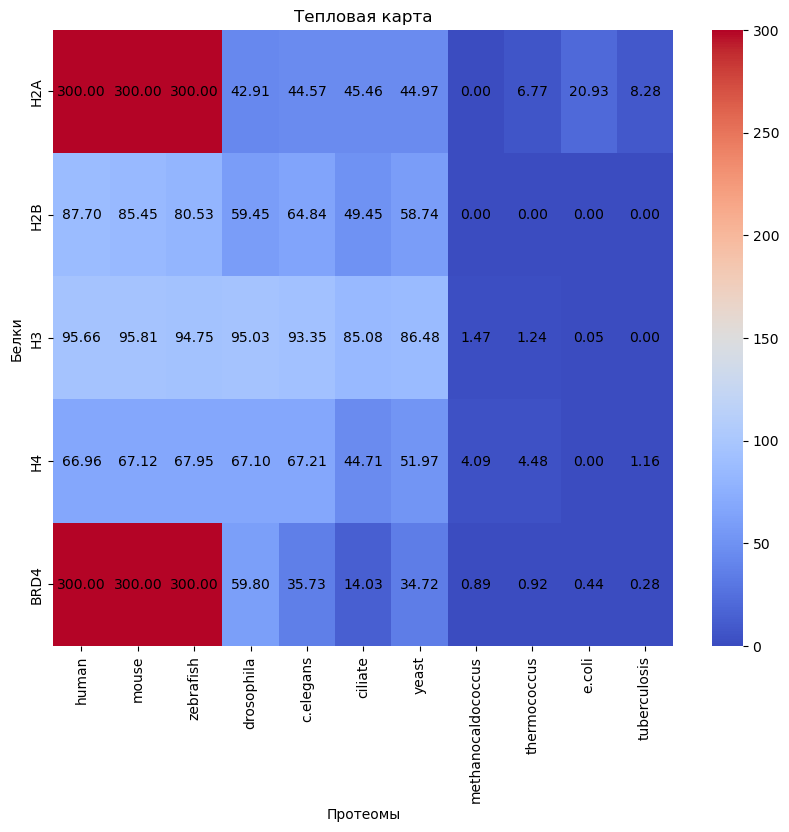

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

df = df.reindex(["human", "mouse", "zebrafish", "drosophila", "c.elegans", "yeast", "ciliate", "methanocaldococcus", "thermococcus", "e.coli", "tuberculosis"], axis=1)

plt.figure(figsize=(10, 8))
sns.heatmap(df, cmap='coolwarm')

for i in range(df.shape[0]):
    for j in range(df.shape[1]):
        plt.text(j + 0.5, i + 0.5, f'{df.iloc[i, j]:.2f}', ha='center', va='center')

plt.xlabel('Протеомы')
plt.ylabel('Белки')

plt.title('Тепловая карта')

plt.savefig("images/heatmap.png")